# New Section

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1HwC6NpSnHYvdhL7tIS_fxyKPsCJ88-4v'}) # replace the id with id of file you want to access
downloaded.GetContentFile('melb_data.csv')

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [ ]:
df.shape

(13580, 21)

In [ ]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum();
percentage_missing = (total_missing/total_cells) * 100
print(f"Missing Percentage: {percentage_missing}%")

Missing Percentage: 4.648292306613367%


In [ ]:
for col in df.columns:
    if df[col].dtype != object:
        df[col].fillna(value=df[col].mean(), inplace=True)
df['CouncilArea'].fillna("unknown",inplace=True)
missing_values_count = df.isnull().sum()
print(missing_values_count)

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


In [ ]:
filtered_df = df
filtered_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
filtered_df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
filtered_df['Suburb'].value_counts()

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Upwey               1
Rockbank            1
New Gisborne        1
Attwood             1
Officer             1
Name: Suburb, Length: 314, dtype: int64

In [ ]:
filtered_df['Type'].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [ ]:
filtered_df['Method'].value_counts()

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64

In [ ]:
filtered_df['SellerG'].value_counts()

Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
                 ... 
Naison              1
McNaughton          1
Aquire              1
Upper               1
Jim                 1
Name: SellerG, Length: 268, dtype: int64

In [ ]:
  filtered_df['CouncilArea'].value_counts()

unknown              1369
Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Maroondah              80
Knox                   80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Moorabool               1
Unavailable             1
Name: CouncilArea, dtype: int64

In [ ]:
filtered_df['Regionname'].value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

In [ ]:
new_df = filtered_df.drop(['Suburb', 'Address', 'SellerG', 'Date'], axis="columns")
new_df.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  int64  
 1   Type           13580 non-null  object 
 2   Price          13580 non-null  float64
 3   Method         13580 non-null  object 
 4   Distance       13580 non-null  float64
 5   Postcode       13580 non-null  float64
 6   Bedroom2       13580 non-null  float64
 7   Bathroom       13580 non-null  float64
 8   Car            13580 non-null  float64
 9   Landsize       13580 non-null  float64
 10  BuildingArea   13580 non-null  float64
 11  YearBuilt      13580 non-null  float64
 12  CouncilArea    13580 non-null  object 
 13  Lattitude      13580 non-null  float64
 14  Longtitude     13580 non-null  float64
 15  Regionname     13580 non-null  object 
 16  Propertycount  13580 non-null  float64
dtypes: float64(12), int64(1), object(4)
memory usage: 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in new_df.columns:
    if new_df[i].dtype== object:
        new_df[i] = le.fit_transform(new_df[i])

In [ ]:
new_df.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,0,1480000.0,1,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,31,-37.7996,144.9984,2,4019.0
1,2,0,1035000.0,1,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,31,-37.8079,144.9934,2,4019.0
2,3,0,1465000.0,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,31,-37.8093,144.9944,2,4019.0
3,3,0,850000.0,0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,31,-37.7969,144.9969,2,4019.0
4,4,0,1600000.0,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,31,-37.8072,144.9941,2,4019.0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  int64  
 1   Type           13580 non-null  int64  
 2   Price          13580 non-null  float64
 3   Method         13580 non-null  int64  
 4   Distance       13580 non-null  float64
 5   Postcode       13580 non-null  float64
 6   Bedroom2       13580 non-null  float64
 7   Bathroom       13580 non-null  float64
 8   Car            13580 non-null  float64
 9   Landsize       13580 non-null  float64
 10  BuildingArea   13580 non-null  float64
 11  YearBuilt      13580 non-null  float64
 12  CouncilArea    13580 non-null  int64  
 13  Lattitude      13580 non-null  float64
 14  Longtitude     13580 non-null  float64
 15  Regionname     13580 non-null  int64  
 16  Propertycount  13580 non-null  float64
dtypes: float64(12), int64(5)
memory usage: 1.8 MB


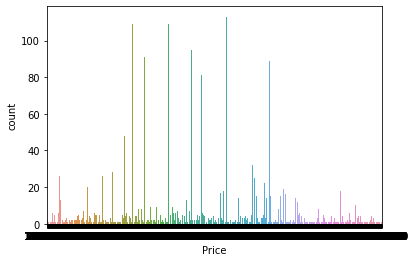

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot('Price', data=new_df)

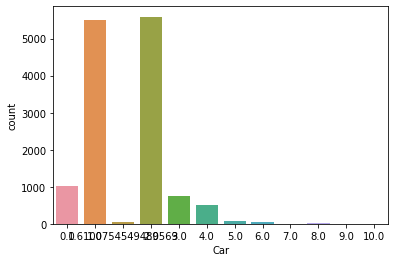

In [ ]:
sns.countplot('Car', data=new_df)

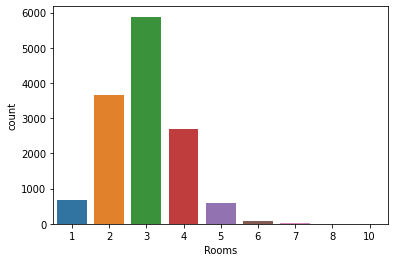

In [ ]:
sns.countplot('Rooms', data=new_df)

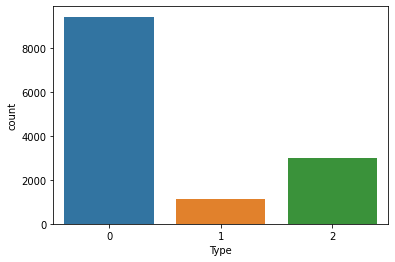

In [ ]:
sns.countplot('Type', data=new_df)

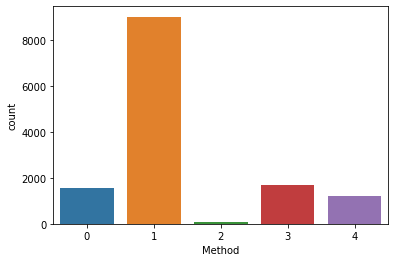

In [ ]:
sns.countplot('Method', data=new_df)

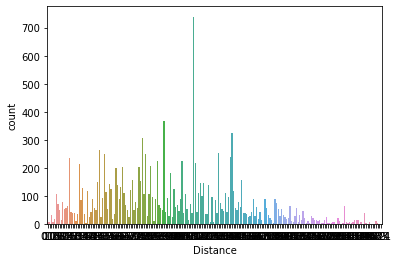

In [ ]:
sns.countplot('Distance', data=new_df)

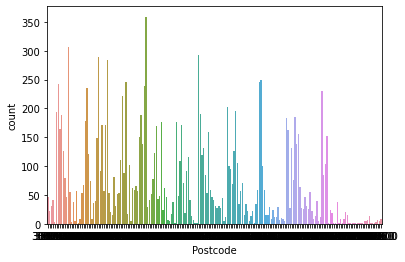

In [ ]:
sns.countplot('Postcode', data=new_df)

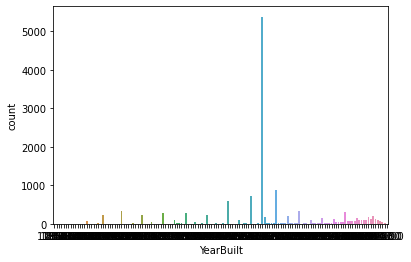

In [ ]:
sns.countplot('YearBuilt', data=new_df)

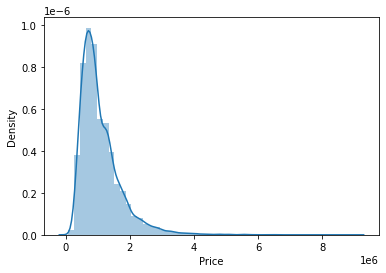

In [ ]:
sns.distplot(df['Price'])

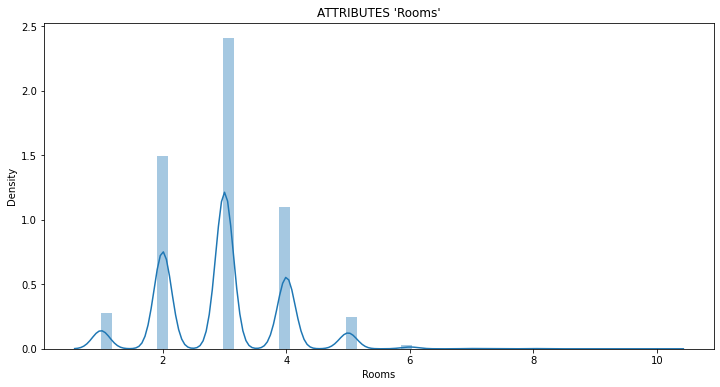

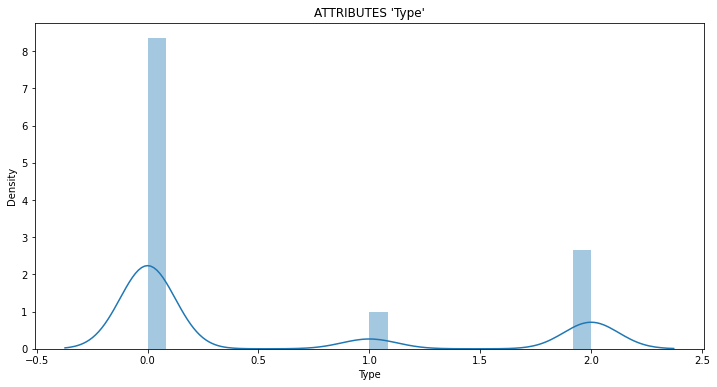

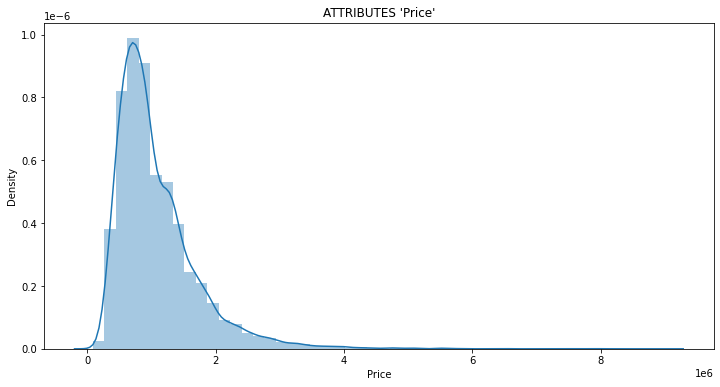

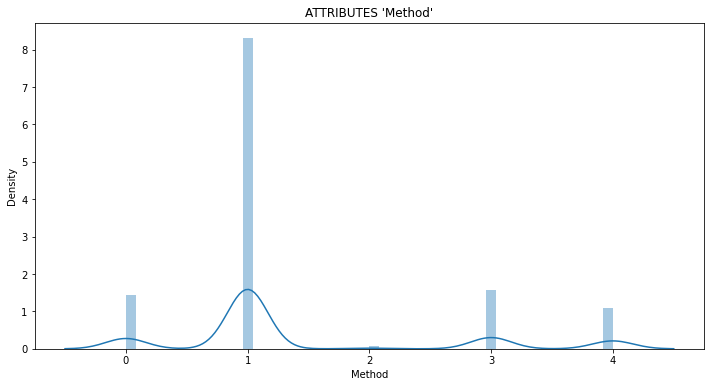

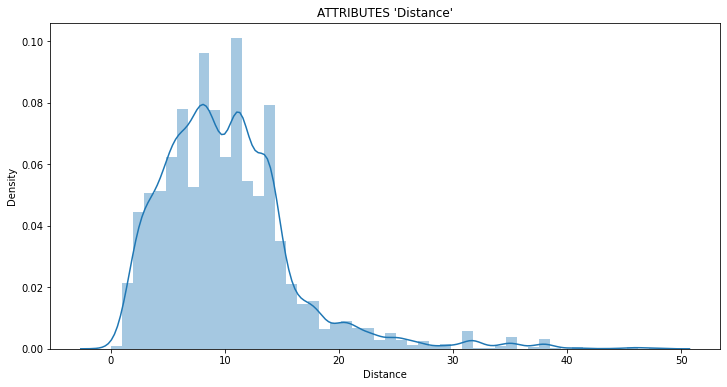

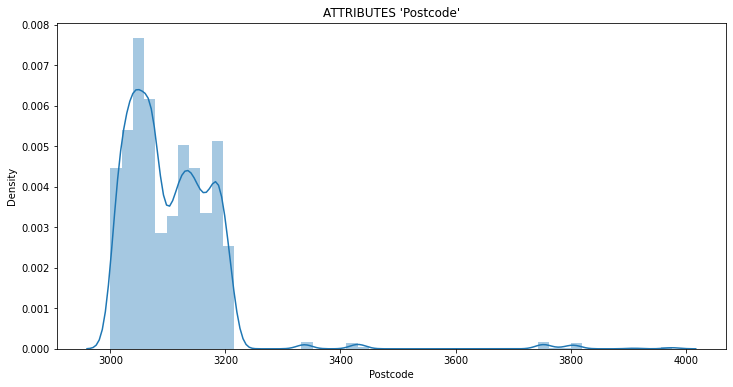

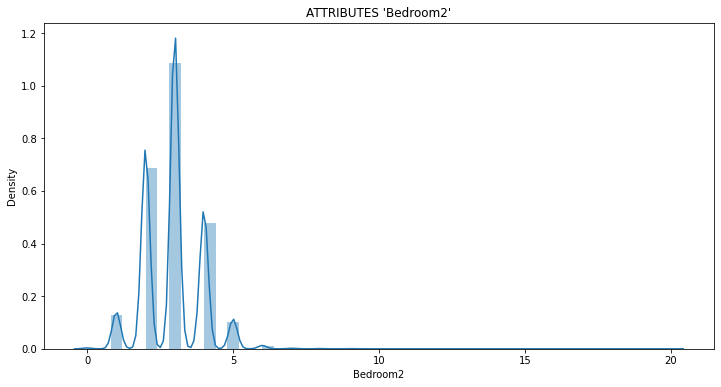

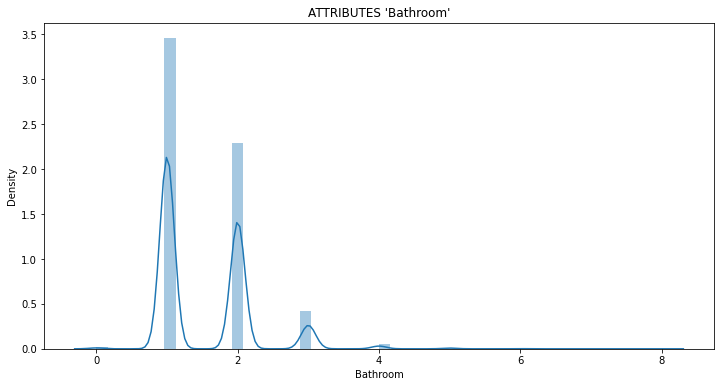

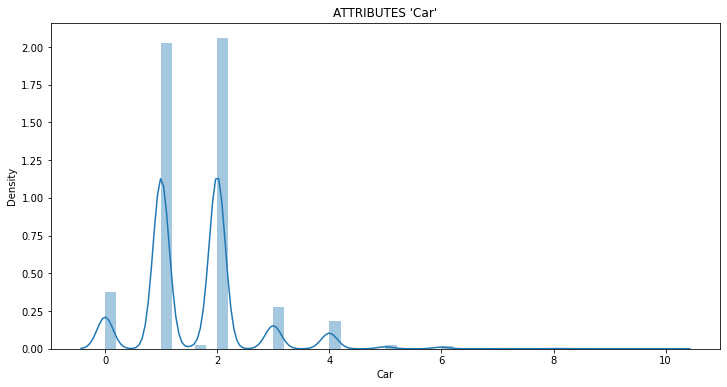

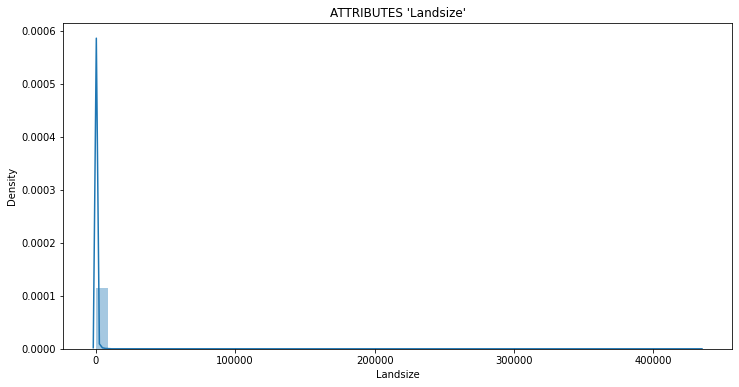

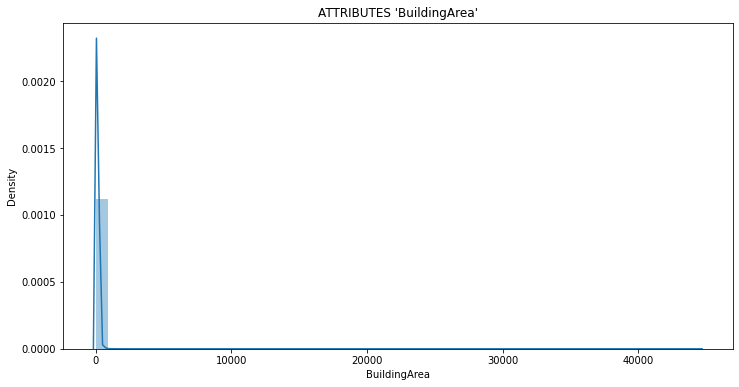

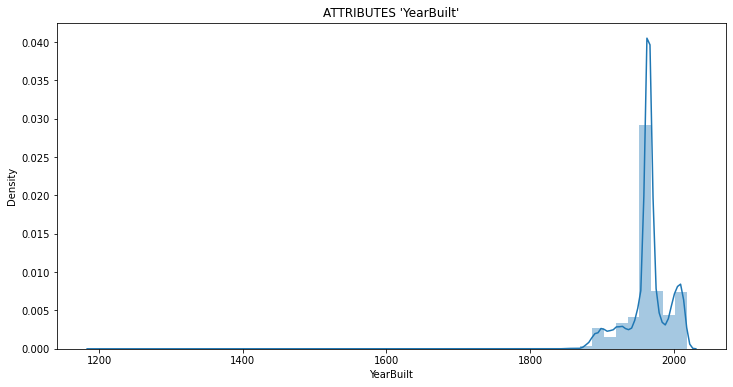

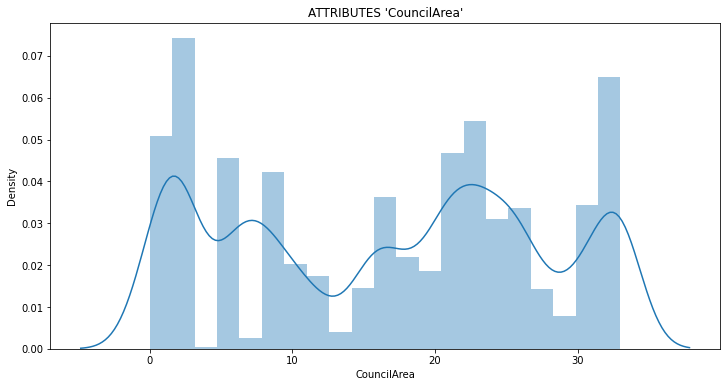

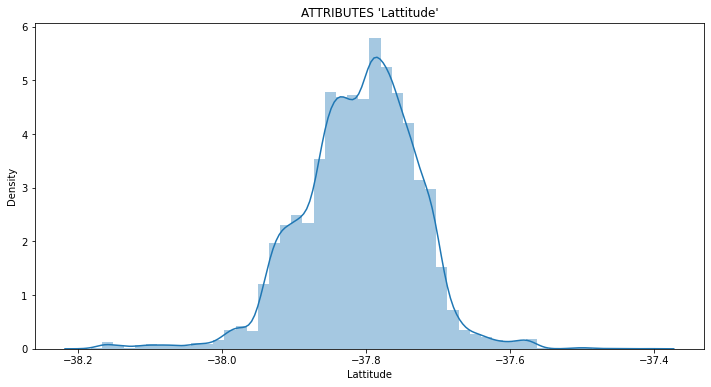

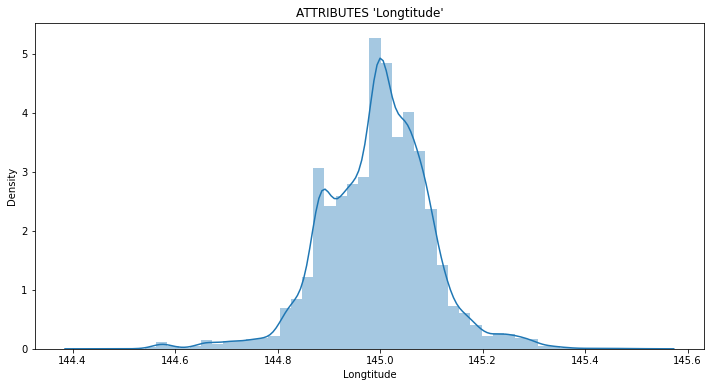

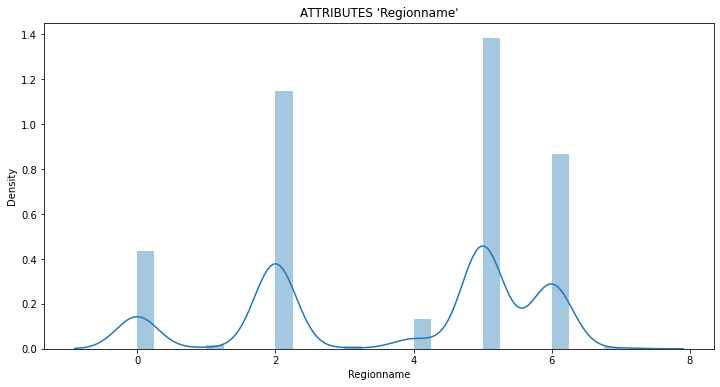

In [ ]:
for i in new_df.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("ATTRIBUTES '%s'"%i)
    sns.distplot(new_df[i])

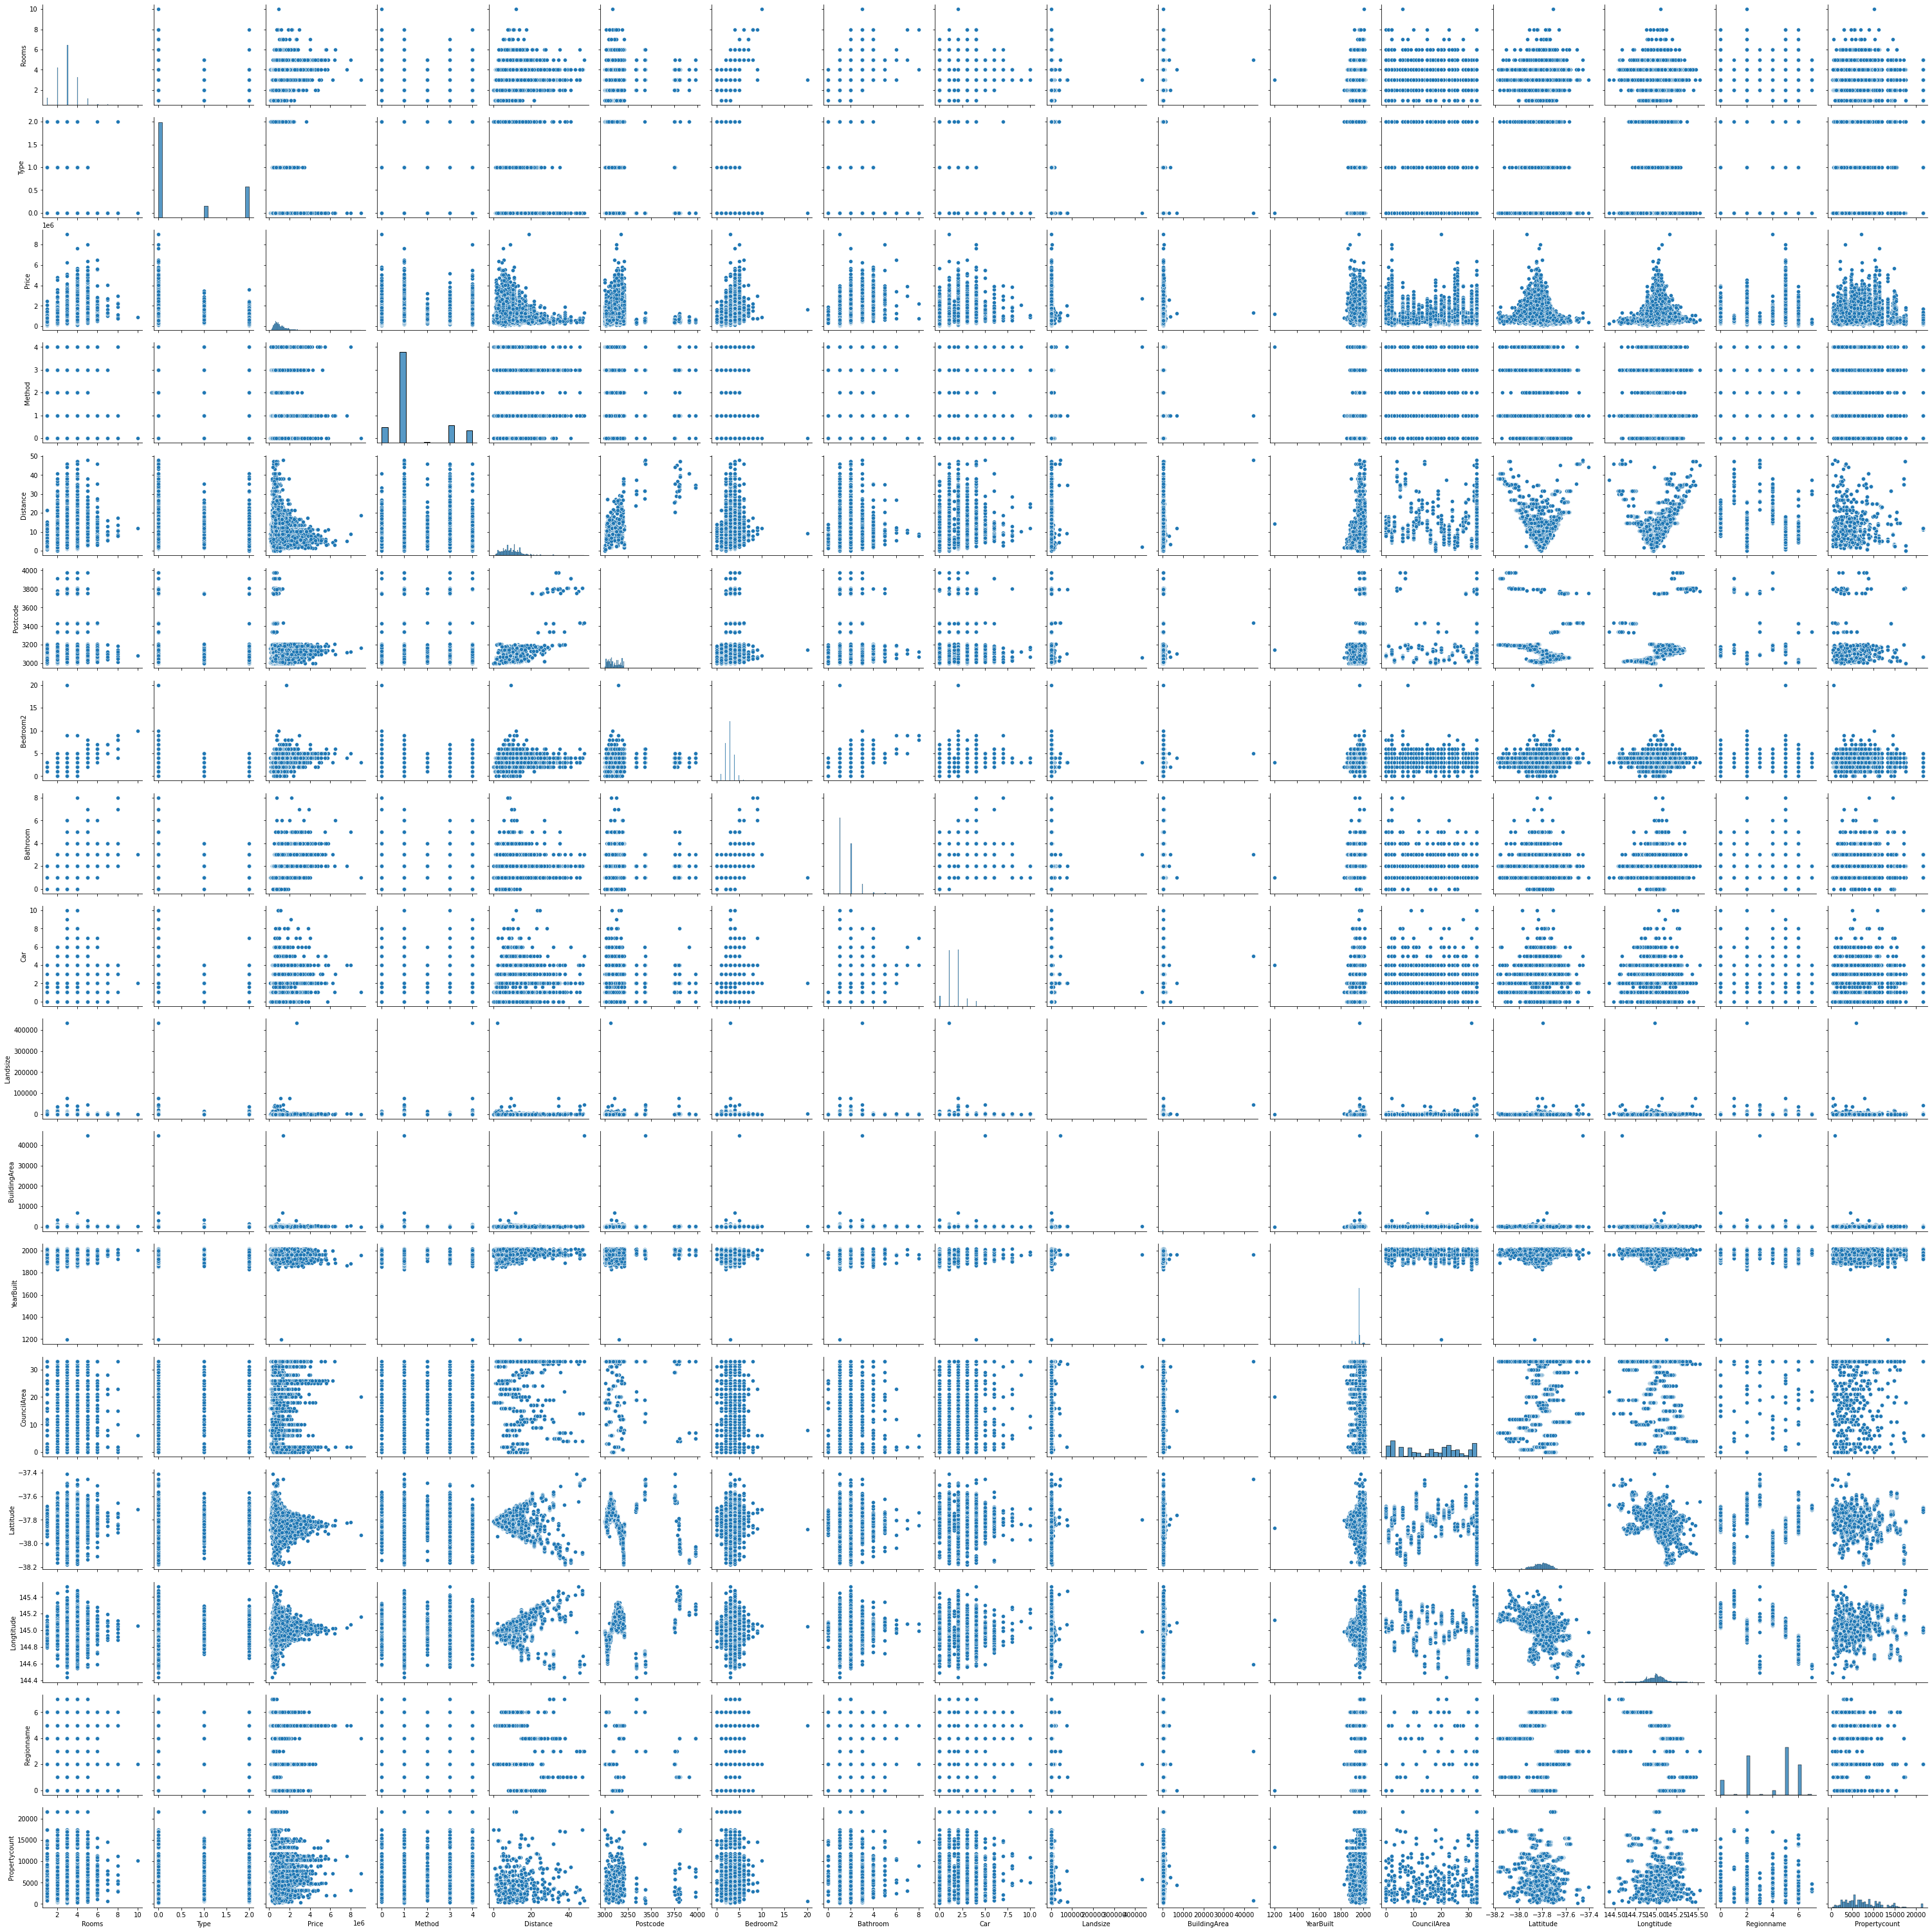

In [ ]:
sns.pairplot(data=new_df)

Text(0.5, 1.0, 'Types of Housing')

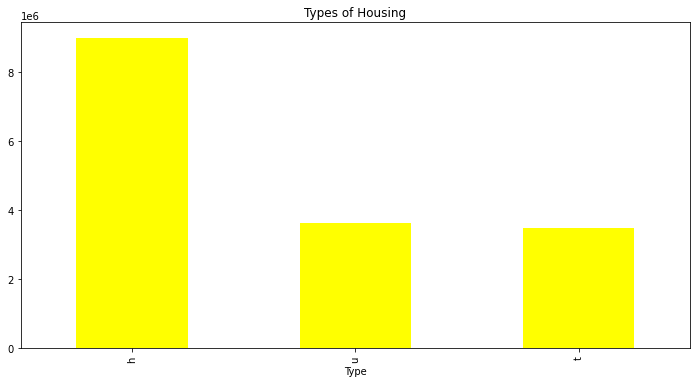

In [ ]:
df.groupby('Type')['Price'].max().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6),color='yellow')
plt.title('Types of Housing')

Text(0.5, 1.0, 'No. of Rooms')

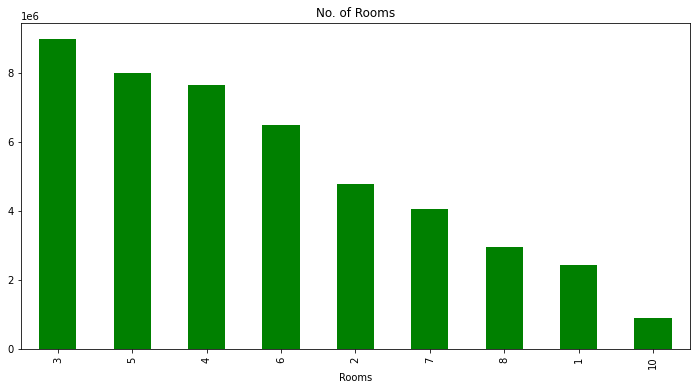

In [ ]:
df.groupby('Rooms')['Price'].max().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6),color='green')
plt.title('No. of Rooms')

Text(0.5, 1.0, 'Region')

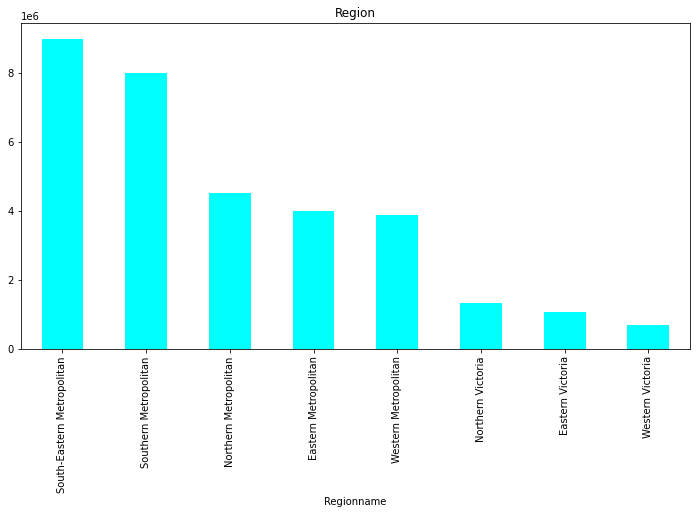

In [ ]:
df.groupby('Regionname')['Price'].max().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6),color='aqua')
plt.title('Region')

Text(0.5, 1.0, 'Method')

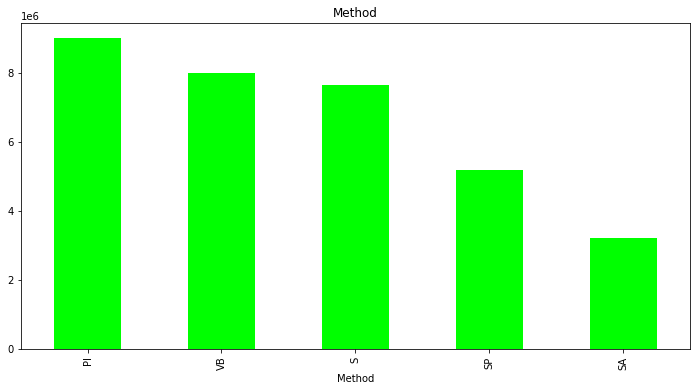

In [ ]:
df.groupby('Method')['Price'].max().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6),color='lime')
plt.title('Method')

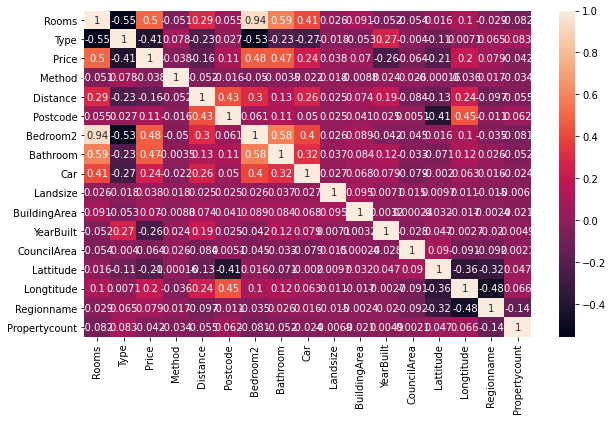

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(new_df.corr(), annot=True)

In [ ]:
X = new_df.drop(['Price'], axis="columns")
X.head()

,Rooms,Type,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,0,1,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,31,-37.7996,144.9984,2,4019.0
1,2,0,1,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,31,-37.8079,144.9934,2,4019.0
2,3,0,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,31,-37.8093,144.9944,2,4019.0
3,3,0,0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,31,-37.7969,144.9969,2,4019.0
4,4,0,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,31,-37.8072,144.9941,2,4019.0


In [ ]:
y = new_df['Price']
y.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)